# Make a video displaying the vehicle parameters
As a way to visualize the data, want a video with the vechile parameters overlaid on top.

This is really hacky because my version of opencv was not compiled with ffmpeg and cannot save to a video file

In [32]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
FIGSIZE = matplotlib.rcParams['figure.figsize']

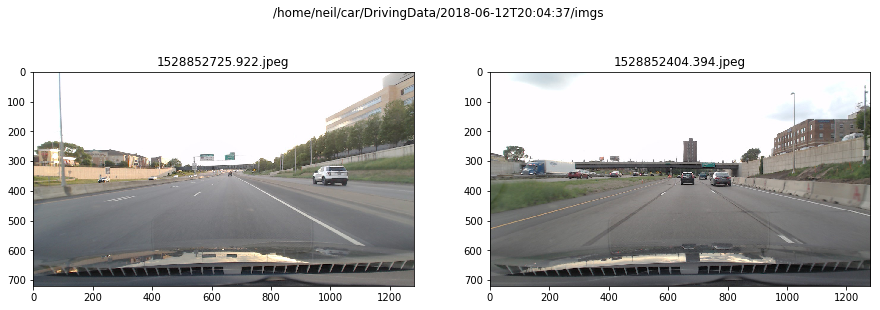

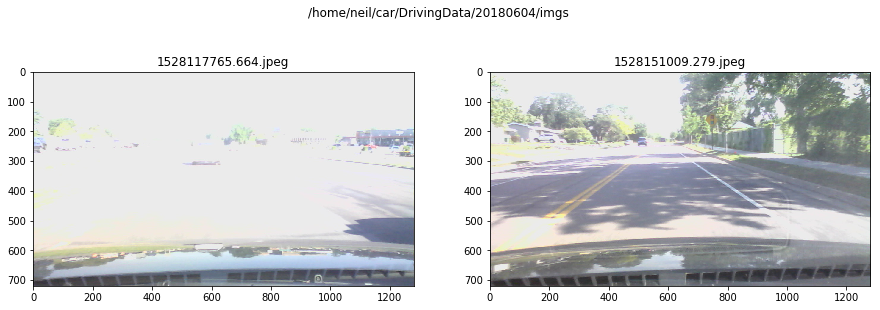

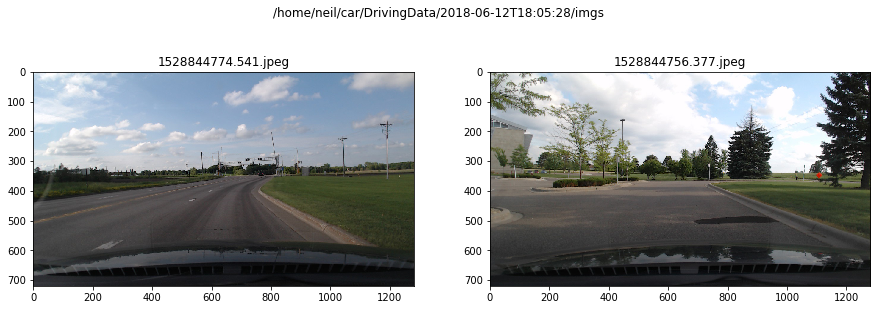

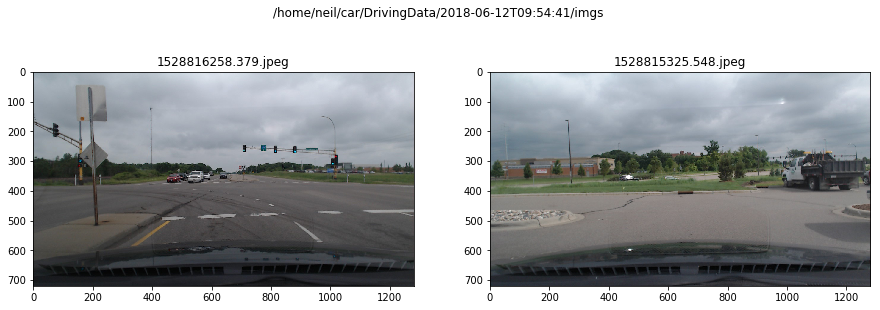

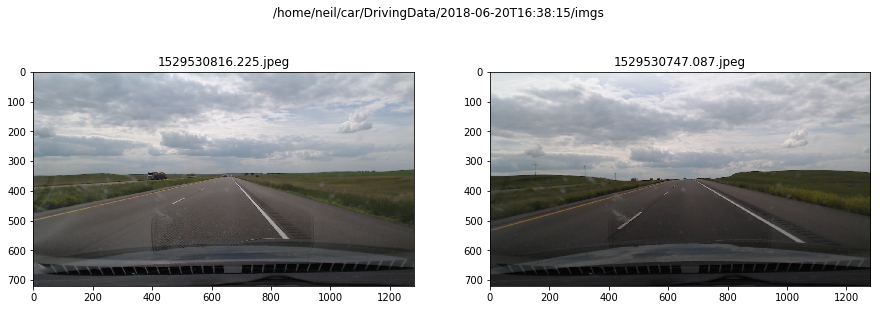

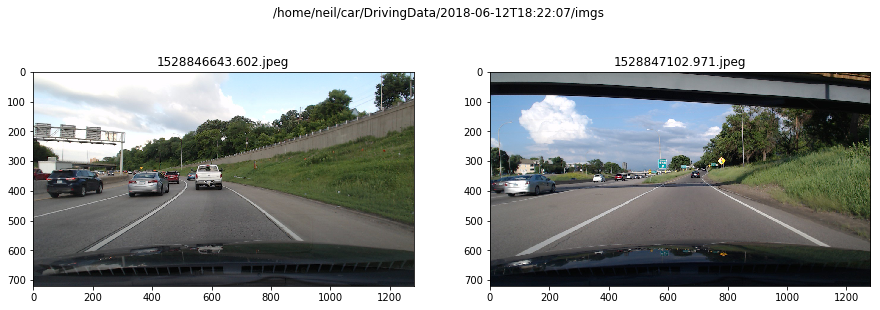

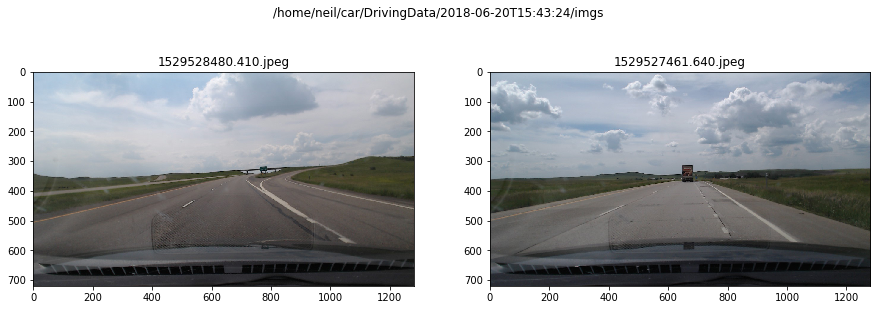

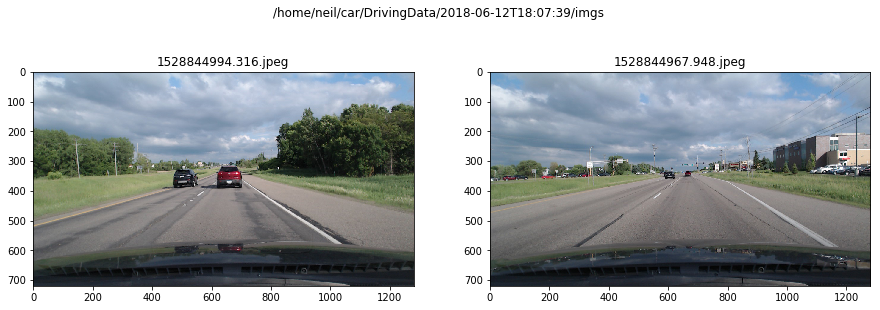

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


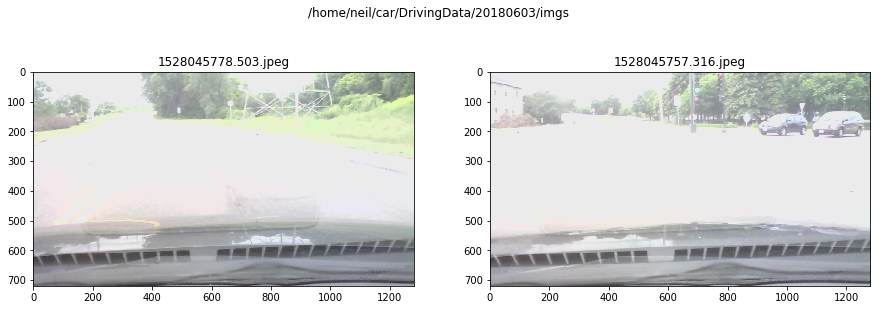

In [30]:
# Get a feel for whats in each recording set
path = "/home/neil/car/DrivingData/"
numToShowFromEachSet = 2

matplotlib.rcParams['figure.figsize'] = [15,5]
for d in os.walk(path):
    imgs = [x for x in d[2] if ".jpeg" in x]
    if len(imgs) > 0:
        # randomly sample from the images
        for ii in range(1,numToShowFromEachSet+1):
            fName = imgs[np.random.randint(0,len(imgs))]
            img = cv2.imread(os.path.join(d[0],fName))[:,:,::-1]
            plt.subplot(1,numToShowFromEachSet,ii)
            plt.title(fName)
            plt.imshow(img)
        plt.suptitle(d[0])
        plt.show()

1) Read in data
2) Get all the images name referenced in the dataset
3) 


In [65]:
path = "/home/neil/car/DrivingData/2018-06-12T18:05:28"
imgPath = os.path.join(path,"imgs")
data = pd.read_csv(os.path.join(path,"interpolatedData.csv"),index_col=None)
data = data.sort_values("TimeStamp") # want to make sure they are in order
imgNames = []
for t in list(data.TimeStamp):
    f = os.path.join(imgPath,"{:0.3f}.jpeg".format(t))
    if os.path.isfile(f):
        imgNames.append(f)
    else:
        print("Invalid file {} at time {}".format(f,t))
    
print("Got {} valid images and times".format(len(imgNames)))

Got 318 valid images and times


In [137]:
path = "/home/neil/car/DrivingData/2018-06-12T18:22:07"
imgPath = os.path.join(path,"imgs")
imgTempPath = os.path.join(path,"imgTemp")
if not os.path.isdir(imgTempPath):
    os.makedirs(imgTempPath)
data = pd.read_csv(os.path.join(path,"interpolatedData.csv"),index_col=None)
data = data.sort_values("TimeStamp") # want to make sure they are in order

data = data[10:]
data = data.reset_index()

In [138]:
font = cv2.FONT_HERSHEY_SIMPLEX
counter = 0
for row in data.iterrows():
    counter += 1
    if counter %10 == 0:
        print("\rProcessing image{}/{}".format(counter,len(data)),end="")
    #if counter > 50:
    #    break
    t = row[1]["TimeStamp"]
    imgName = os.path.join(imgPath,"{:.3f}.jpeg".format(t))
    img = cv2.imread(imgName)
    
    for idx,colName in enumerate(row[1].index):
        if colName == "TimeStamp":
            continue
        cv2.putText(img,"{}: {:.5f}".format(colName,row[1][colName]),(10,35*idx), font, 1,(0,0,0),2,cv2.LINE_AA)
    cv2.imwrite(os.path.join(imgTempPath,"{:04}.jpeg".format(counter)),img)
    
    
#os.system("ffmpeg -r 1 -i img%01d.png -vcodec mpeg4 -y movie.mp4")
tempImgString = imgTempPath+"/%04d.jpeg"
outputVideoString = os.path.join(path,"outputVideo.mp4")
os.system("ffmpeg -i {} {}".format(tempImgString,outputVideoString))
    


0